<a href="https://colab.research.google.com/github/Akshay-Rajesh/Note/blob/main/K_means%2C_accuracy_%2C_crosstab%2C_pipeline_%2Cagglomerative_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K- Means clustering :

we have data set Mall_Customers and we have to sort the customers accoridng to annual income or age or spending score 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
data = pd.read_csv("Mall_Customers.csv")

In [4]:
X = data.iloc[ : ,[3,4]].values

In [5]:
%whos

Variable   Type         Data/Info
---------------------------------
X          ndarray      200x2: 400 elems, type `int64`, 3200 bytes
data       DataFrame         CustomerID   Genre  <...>n\n[200 rows x 5 columns]
np         module       <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd         module       <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>


In [6]:
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

269981.28
181363.59595959593
106348.37306211122
73679.78903948836
44448.4554479337
37233.814510710006
30259.65720728547
25011.839349156588
21850.165282585636
19672.072849014323


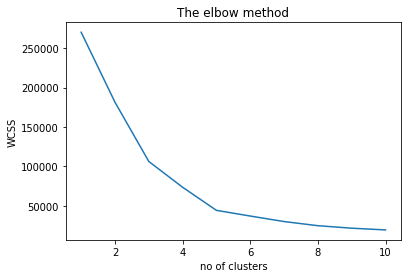

In [8]:
#Elbow method to find the K value 

from sklearn.cluster import KMeans

wcss =[]
for i in range (1,11):
  kmeans = KMeans(n_clusters = i , init ="k-means++" ,random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  print(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.show()

In [9]:
model = KMeans(n_clusters=5 ,init ="k-means++", random_state=42)

y_kmeans = model.fit_predict(X)

In [10]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

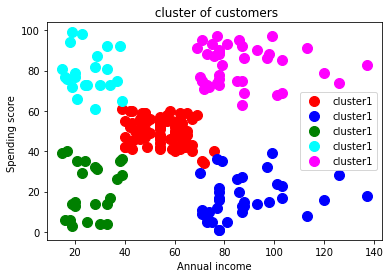

In [11]:
plt.scatter(X[y_kmeans == 0,0] , X[y_kmeans == 0,1] , s =100 , c ="red" , label ="cluster1")
plt.scatter(X[y_kmeans == 1,0] , X[y_kmeans == 1,1] , s =100 , c ="blue" , label ="cluster1")
plt.scatter(X[y_kmeans == 2,0] , X[y_kmeans == 2,1] , s =100 , c ="green" , label ="cluster1")
plt.scatter(X[y_kmeans == 3,0] , X[y_kmeans == 3,1] , s =100 , c ="cyan" , label ="cluster1")
plt.scatter(X[y_kmeans == 4,0] , X[y_kmeans == 4,1] , s =100 , c ="magenta" , label ="cluster1")

plt.title(" cluster of customers")
plt.xlabel("Annual income")
plt.ylabel("Spending score ")
plt.legend()
plt.show()

# **Here we have segmented the customers that are comming to the mall based on their annual income and spending score **

# ***Heirarchical clustering ***

In [12]:
#Aggolometrical clustering

X = data.iloc[ : ,[3,4]].values

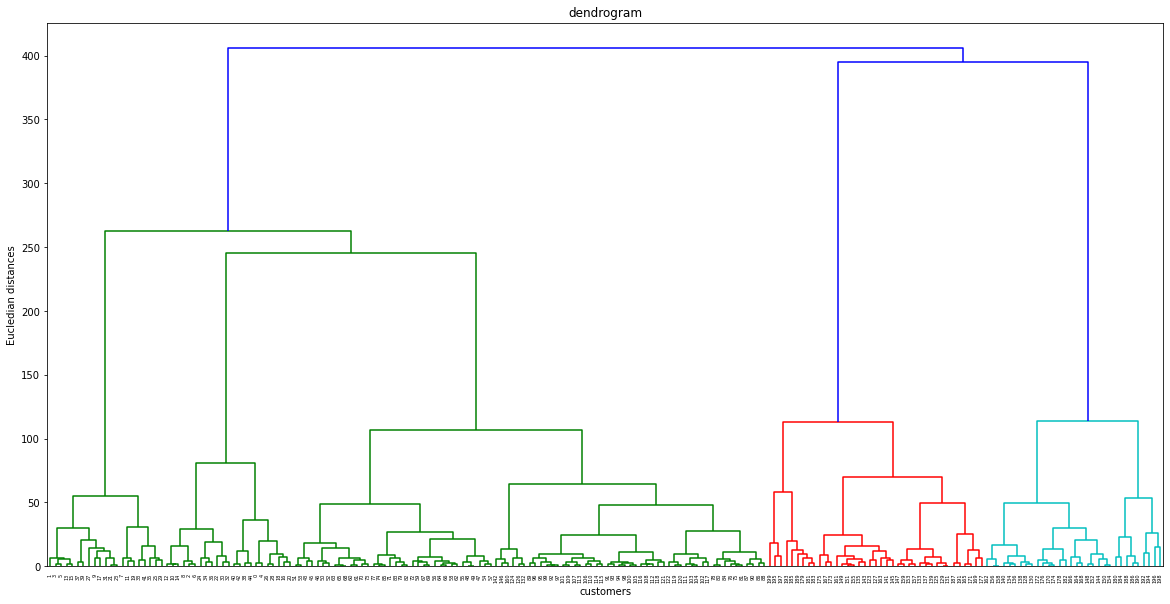

In [13]:
#Using the dendrogram to find the optimal number of clusters

import scipy.cluster.hierarchy as sch
plt.subplots(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))

plt.title("dendrogram")
plt.xlabel("customers")
plt.ylabel("Eucledian distances")
plt.show()

Optimun number of clusters = 5 , by checking the above dendrogram we can see the farthest longest line is the last blue line and if we cut it oarellelll it gets cut in 5 points so optimun number of clusters = 5

In [16]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5 , affinity = "euclidean" , linkage = "ward")

y_hc = hc.fit_predict(X)

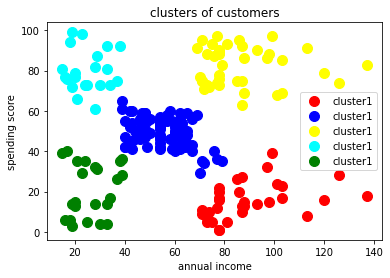

In [17]:
plt.scatter(X[y_hc == 0,0] , X[y_hc == 0,1] , s = 100 , c ="red" , label ="cluster1")
plt.scatter(X[y_hc == 1,0] , X[y_hc == 1,1] , s = 100 , c ="blue" , label ="cluster1")
plt.scatter(X[y_hc == 2,0] , X[y_hc == 2,1] , s = 100 , c ="yellow" , label ="cluster1")
plt.scatter(X[y_hc == 3,0] , X[y_hc == 3,1] , s = 100 , c ="cyan" , label ="cluster1")
plt.scatter(X[y_hc == 4,0] , X[y_hc == 4,1] , s = 100 , c ="green" , label ="cluster1")

plt.title("clusters of customers")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.legend()
plt.show()

In [18]:
# K means clustering for IRIS data set 

data2 = pd.read_csv("Iris.csv")

In [19]:
data2.head(1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa


In [22]:
# for clustering we need only the sepal and petal data 
X = data2.iloc[ : , 1:5]

In [24]:
X.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2


In [27]:
from sklearn.cluster import KMeans
model_iris = KMeans(n_clusters = 3)
model_iris.fit(X)
labels = model_iris.predict(X)

In [28]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [30]:
model_iris = KMeans(n_clusters = 5)
model_iris.fit(X)
labels = model_iris.predict(X)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 3 3 2 3 2 2 3 2 3 2 3 3 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 0 3 4 0 0 4 2 4 0 4 0
 0 0 3 0 0 0 4 4 3 0 3 4 3 0 4 3 3 0 4 4 4 0 3 3 4 0 0 3 0 0 0 3 0 0 0 3 0
 0 3]


In [31]:
model_iris = KMeans(n_clusters = 3)
model_iris.fit(X)
labels = model_iris.predict(X)

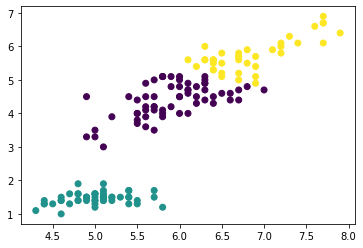

In [34]:
plt.scatter(X["SepalLengthCm"] , X["PetalLengthCm"] , c =labels)

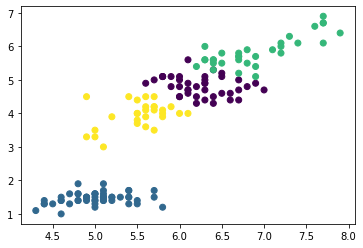

In [35]:
model_iris = KMeans(n_clusters = 4)
model_iris.fit(X)
labels = model_iris.predict(X)
plt.scatter(X["SepalLengthCm"] , X["PetalLengthCm"] , c =labels)

# **This is how we can plot the clusters in a scatter plot , here we are visualizing 2 features .**

In [42]:
# if we have a net input and we wnat to predict it 

sample = [[7.5,2.2,6.2,1]]

out = model_iris.predict(sample)
print(out)

[2]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


# **This is how we are giving a new input to the mmodel and see which cluster it is comming **

In [43]:
model_iris = KMeans(n_clusters = 3)
model_iris.fit(X)
labels = model_iris.predict(X)

In [44]:
# for a good model the inertia should be low
model_iris.inertia_

78.940841426146

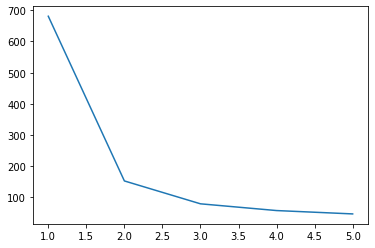

In [50]:
wcss = []
for i in  range(1,6):
  kmeans = KMeans(n_clusters = i , init="k-means++" , random_state=42 )
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,6) , wcss)

we can see ideal number of clusters is 3 using the elbow method

In [51]:
#Evaluate the model  to evaluate the model we will use the data of species names whcih we already have , we will compared it with ourt model which gave us three clusters .

data2["Species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [53]:
species = data2["Species"]
df = pd.DataFrame ({"label" : labels , "Species" : species})

In [55]:
pd.crosstab(df["label"] , df["Species"])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
label,,,
0,50,0,0
1,0,48,14
2,0,2,36


This is how we check our accuracy of model . We had 50 each for setose , versicolor , virginica . Looking at the above table we can see setosa is classified correct all 50 in one cluster . versicolor has 48 correct and 2 wrong , virginica has 36 correct and 14 wrong 

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.pipeline import make_pipeline # pipeline helps to do sclaing together to data and model
pipe = make_pipeline(scaler, model_iris)   # we have to give like this 
pipe.fit(X)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [59]:
labels_sc = pipe.predict(X)
print(labels_sc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 1 2 2
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [60]:
species = data2["Species"]
df = pd.DataFrame ({"label" : labels_sc , "Species" : species})

pd.crosstab(df["label"] , df["Species"])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
label,,,
0,50,0,0
1,0,39,17
2,0,11,33


We can see scaling did not improve our model but made it bad 

In [62]:
# Normalization

from sklearn.preprocessing import Normalizer
norm = Normalizer()

pipe1 = make_pipeline(norm ,model_iris)
pipe1.fit(X)

labels_norm = pipe1.predict(X)

In [63]:
species = data2["Species"]
df = pd.DataFrame ({"label" : labels_norm , "Species" : species})

pd.crosstab(df["label"] , df["Species"])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
label,,,
0,50,0,0
1,0,5,50
2,0,45,0


Looks like our model improved we can now correctly see two species corrctly classified and only 5 wrong .

# ***Heirarchical CLustering , Aggolomerative***

In [64]:
X = data2.iloc[ : , 1:5]

In [66]:
X.describe() # by looking at std we can see our data needs normalization

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [67]:
# Normalization

from sklearn.preprocessing import Normalizer
norm = Normalizer()
X = norm.fit_transform(X)

In [73]:
# here we find the optimal no of clusters using dendrogram'
from scipy.cluster.hierarchy import dendrogram,linkage

link = linkage(X , method="ward")

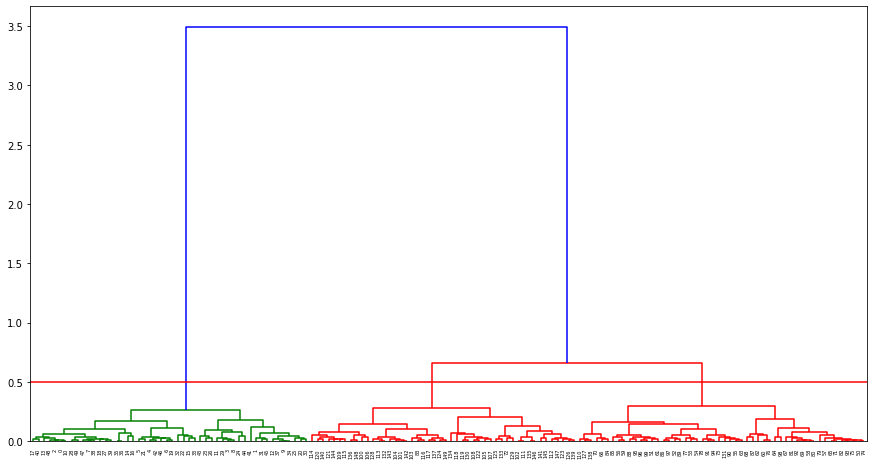

In [75]:
plt.figure(figsize=(15,8))

dendrogram(link , orientation="top" , distance_sort ="ascending" , show_leaf_counts=True)
plt.hlines(0.5,0,5000,colors="red" , linestyles="solid") # for thehorizontal cut line 
plt.show()

In [ ]:
# from the above cut we can see 3 clusters need to be made

In [80]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3 , affinity = "euclidean" , linkage = "ward")

In [81]:
labels_agg = cluster.fit_predict(X)

In [82]:
species = data2["Species"]
df = pd.DataFrame ({"label" : labels_agg , "Species" : species})

pd.crosstab(df["label"] , df["Species"])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
label,,,
0,0,48,4
1,50,0,0
2,0,2,46
